# Importing libraries and data

In [2]:
!pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# --- Python 
from datetime import datetime
import matplotlib.dates as mdates
#-- Import DataSet
# from google.colab import files
# uploaded = files.upload()
# import io
# df = pd.read_csv(io.BytesIO(uploaded['Walmart.csv']))

df = pd.read_csv('./data/Wallmart.csv')


# Exploratory Data Analysis (EDA)

In [3]:
list(df.columns)

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df['formated_date'] =  df.apply(lambda x: datetime.strptime(x['Date'], '%d-%m-%Y'), axis=1)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,formated_date
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05


### What is the average weekly sale price per store?

In [8]:
df_2 = df.groupby(['Store'] , as_index = False).agg({'Weekly_Sales': 'mean' })
df_2.reset_index(drop=True)
df_2.sort_values(by=['Weekly_Sales'], ascending=False).head()

,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06


### What is the average weekly sales on holidays per store?

In [9]:
df_holidays = df[df['Holiday_Flag'] == 1]
df_holidays = df_holidays.groupby(['Store'] , as_index = False).agg({'Weekly_Sales': 'mean' })
df_holidays.sort_values(by=['Weekly_Sales'], ascending=False).head()
# df_holidays.Holiday_Flag.value_counts(normalize=True)*100

,Store,Weekly_Sales
19,20,2249035.081
3,4,2243102.624
13,14,2120582.998
9,10,2113755.949
12,13,2113043.806


### Which attribute has the highest correlation (positive or negative) with the number of sales?

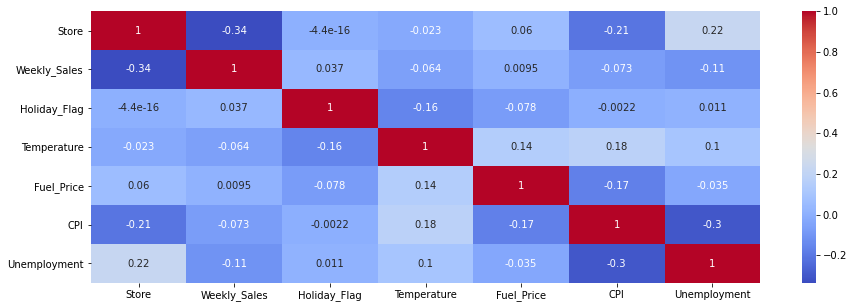

In [10]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

### From the store with the highest total sales (sum of sales for the entire period), how many weeks of the year did it exceed the average for the period?

In [11]:
df_2 = df.groupby(['Store'] , as_index = False).agg({'Weekly_Sales': 'sum' })
df_2.reset_index(drop=True)
df_2.sort_values(by=['Weekly_Sales'], ascending=False).head()

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [12]:
df_most_selling_store = df[df['Store'] == 20]
df_most_selling_store[["formated_date","Weekly_Sales","Store"]].head()

,formated_date,Weekly_Sales,Store
2717,2010-02-05,2401395.47,20
2718,2010-02-12,2109107.90,20
2719,2010-02-19,2161549.76,20
2720,2010-02-26,1898193.95,20
2721,2010-03-05,2119213.72,20


In [13]:
df_weekly_sales_mean = df.groupby(['formated_date'] , as_index = False).agg({'Weekly_Sales': 'mean' })
df_weekly_sales_mean["Store"] = "mean"
# df_weekly_sales_mean.reset_index(drop=True)
df_weekly_sales_mean.sort_values(by=['Weekly_Sales'], ascending=False).head()


,formated_date,Weekly_Sales,Store
46,2010-12-24,1.798476e+06,mean
98,2011-12-23,1.711072e+06,mean
94,2011-11-25,1.479858e+06,mean
42,2010-11-26,1.462689e+06,mean
45,2010-12-17,1.373796e+06,mean


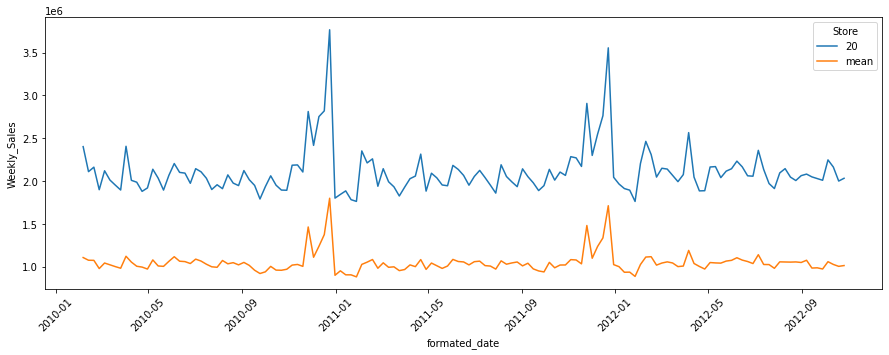

In [14]:
# df_holidays_20 = df[df['Holiday_Flag'] == 1]
# df_holidays_20 = df_holidays_20[df_holidays_20['Store'] == 20]
# union_dfs = pd.concat([df_holidays_20[["formated_date","Weekly_Sales","Store"]], df_weekly_sales_mean])
union_dfs = pd.concat([df_most_selling_store[["formated_date","Weekly_Sales","Store"]], df_weekly_sales_mean])
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.lineplot(data=union_dfs.reset_index(drop=True), x="formated_date", y="Weekly_Sales", hue="Store")
plt.show()

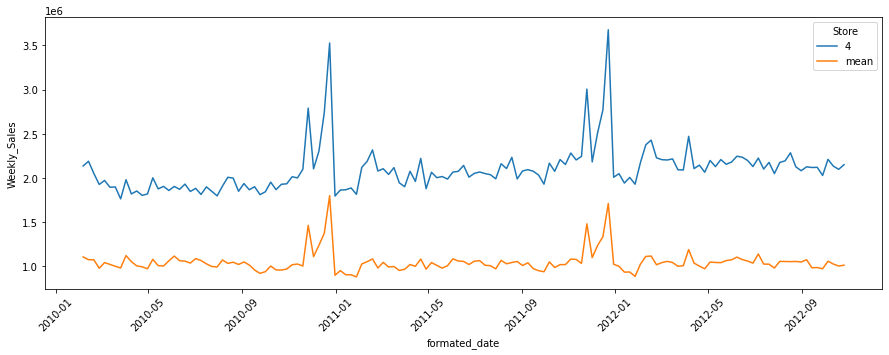

In [15]:
df_store = df[df['Store'] == 4]
df_store[["formated_date","Weekly_Sales","Store"]].head()

union_dfs = pd.concat([df_store[["formated_date","Weekly_Sales","Store"]], df_weekly_sales_mean])
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.lineplot(data=union_dfs.reset_index(drop=True), x="formated_date", y="Weekly_Sales", hue="Store")
plt.show()  #

### Plot the maximum, minimum, and average sales of all stores across the period. Highlight in some way the period of holidays mentioned above.

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

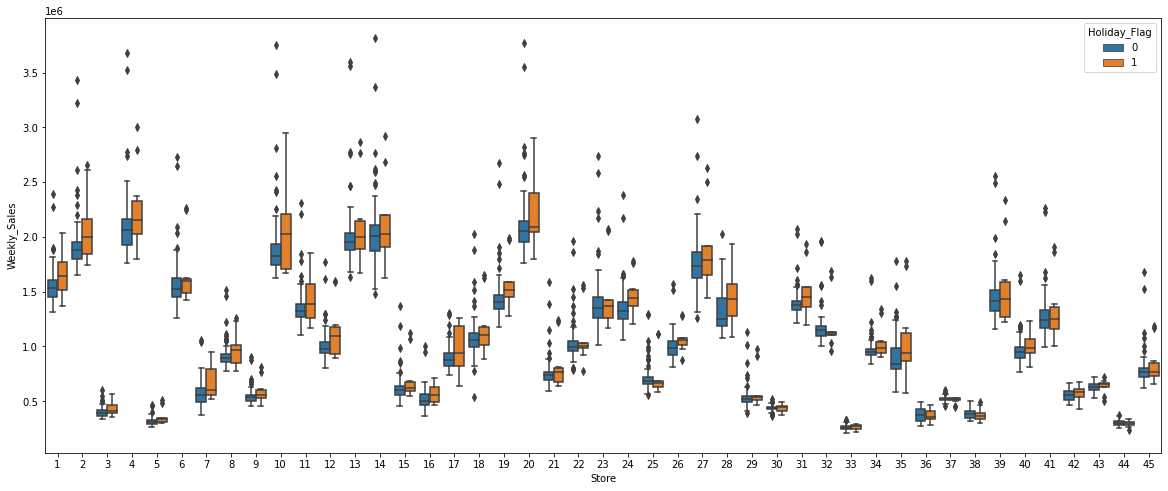

In [16]:
plt.figure(figsize=(20, 8))
# sns.boxplot(data=df, x="Store", y="Weekly_Sales")
sns.boxplot(data=df, x="Store", y="Weekly_Sales",  hue="Holiday_Flag")
# sns.boxplot(data=df, x="Store", y="Weekly_Sales",  hue="Holiday_Flag", dodge=False)


# Thinking about invest on one of the stores, which store would you choose and why?

### The recommendation would be to choose the **number 20** store, this has the highest total sales profit, the best average sales in that period and also has the best average sales on holidays, and as we could see there is a positive correlation between sales and holidays, especially the end of year festivities where sales increase significantly for most stores as we can see in the boxplot